<img src="./img/HWNI_logo.svg"/>

# Problem Set 2

In [1]:
library(ggplot2)
options(repr.plot.width  = 5,
        repr.plot.height = 4)

## Problem 2 - A 1-Sample Paired t-Test

Certain types of nerve cells have the ability to regenerate a part of the cell that has been amputated. In an early study of this process, measurements were made on the nerves in the spinal cord of rhesus monkeys. Nerves emanating from the left side of the cord were cut, while nerves from the right side were kept intact. During the regeneration process, the amount of creatine phosphate (CP) was measured in the left and right portions of the spinal cord. You are interested in whether CP levels are different between the cut and control sides of the spinal cord. [adapted from Samuels & Witmer, pg 387. Originally: Bodian (1947)]

### a) Let's say a paired t-test is the most appropriate test for this data set. What assumptions are we making?

We are assuming that the data are independently drawn from normal distributions with equal (or at least similar) variances but possibly different means.

### b) Load in and visualize the data (as a histogram, boxplot, and connecting pairs). 

In [17]:
cpData <- read.table("./data/2_2.csv",
                    sep=",",
                    header=TRUE)

In [16]:
head(cpData)

,cpLevel,side,organismIdx
1,16.3,Control_R,1
2,4.8,Control_R,2
3,10.9,Control_R,3
4,14.2,Control_R,4
5,16.3,Control_R,5
6,9.9,Control_R,6


In [4]:
print(cpData$side)

 [1] Control_R Control_R Control_R Control_R Control_R Control_R Control_R
 [8] Control_R Regen_L   Regen_L   Regen_L   Regen_L   Regen_L   Regen_L  
[15] Regen_L   Regen_L  
Levels: Control_R Regen_L


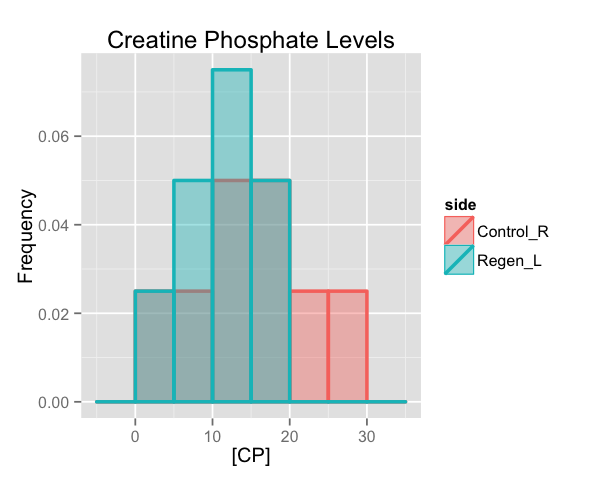

In [5]:
# set the data we're going to use
# and which elements of the plot come from which variables
p <- ggplot(cpData) + 
                aes(x = cpLevel,
                    color = side,
                    fill = side,
                    #use following to get frequencies instead of counts
                   ..density.., 
                   )

# pick the "geometry", aka the kind of plot
p <- p + geom_histogram(binwidth=5, #bigger for a coarser view
                    alpha=I(0.4), #transparency so we can see behind
                    size=1, #thicker lines look nicer
                    position='identity'
                    )

#set the title  
figTitle <- "Creatine Phosphate Levels"

#add labels
p <- p + xlab("[CP]") +
            ylab("Frequency") +
            ggtitle(figTitle)
p #show the plot

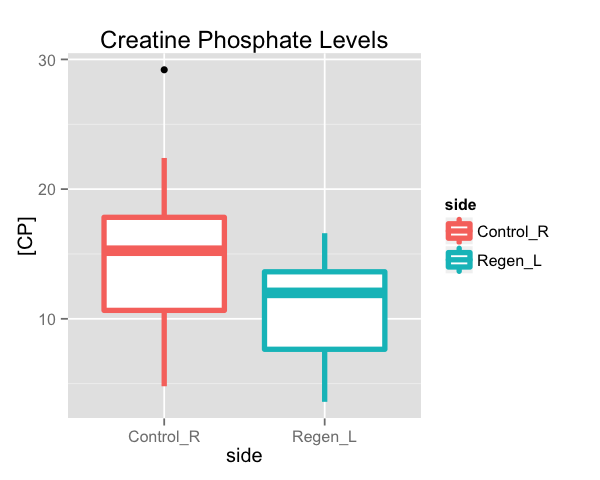

In [6]:
# set the data we're going to use
# and which elements of the plot come from which variables
p <- ggplot(cpData) + 
                aes(x = side,
                    y = cpLevel,
                    color=side,
                   )

# pick the "geometry", aka the kind of plot
p <- p + geom_boxplot(
                    size=1.5, #thicker lines look nicer
                    )

#set the title  
figTitle <- "Creatine Phosphate Levels"

#add labels
p <- p + ylab("[CP]") +
            ggtitle(figTitle)
p #show the plot

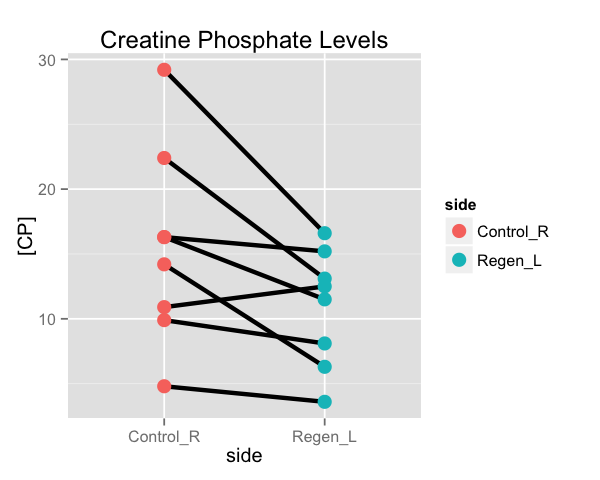

In [7]:
# set the data we're going to use
# and which elements of the plot come from which variables

p <- ggplot(cpData) + 
                aes(x = side,
                    y = cpLevel,
                    color=side,
                    group=organismIdx #needed to get the lines right
                   )

# pick the "geometry", aka the kind of plot
p <- p + geom_line(color="black",
                   size=1.25) +
            geom_point(size=4)

#set the title  
figTitle <- "Creatine Phosphate Levels"

#add labels
p <- p + ylab("[CP]") +
            ggtitle(figTitle)
p #show the plot

### c) Run a paired sample t-test. Is there a statistical difference in CP levels?

In [8]:
control <- subset(cpData,side == 'Control_R')
regen <- subset(cpData,side != 'Control_R')

t.test(control$cpLevel,regen$cpLevel,
      paired=TRUE
      )


	Paired t-test

data:  control$cpLevel and regen$cpLevel
t = 2.6847, df = 7, p-value = 0.03133
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5528512 8.7221488
sample estimates:
mean of the differences 
                 4.6375 


Yes, there is a statistically significant difference at $p \approx 0.03$

### d) What happens when you run a 2-sample t-test? Explain why you might see a difference in results between the 1-sample and 2-sample test.

In [9]:
t.test(control$cpLevel,regen$cpLevel,
      paired=FALSE
      )


	Welch Two Sample t-test

data:  control$cpLevel and regen$cpLevel
t = 1.4848, df = 11.345, p-value = 0.1648
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.211515 11.486515
sample estimates:
mean of x mean of y 
  15.5000   10.8625 


If we treat the data as un-paired, we don't see a significant difference between the groups. This is because the within-group variability is large enough to mask the between-group variability.

### e) Paired t-tests are essentially one-sample t-tests. A paired t-test takes the two measurements, subtracts them, and then runs a one-sample t-test testing if the mean is equal to zero. Try this alternative procedure out and compare the results with the results using the paired t-test.

In [10]:
oneSample <- regen$cpLevel - control$cpLevel

t.test(oneSample)


	One Sample t-test

data:  oneSample
t = -2.6847, df = 7, p-value = 0.03133
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -8.7221488 -0.5528512
sample estimates:
mean of x 
  -4.6375 


We get the exact same result, as promised!

## Problem 3

### a) Although we previously assumed that a paired t-test was the most appropriate test, one could argue that a paired nonparametric test would be more appropriate. Why or why not?

We aren't sure that the data was drawn, in both cases, from a normal distribution with the same variance. In fact, it appears that the left, regenerating side has higher variance, as we might expect from biology. Normality is difficult to test with such a small sample size, so a non-parametric test is safer, if less likely to result in statistical significance.

### b) Assuming a paired nonparametric test is most appropriate, is there a statistical difference in CP levels? (use `wilcox.test`)

In [11]:
wilcox.test(regen$cpLevel,control$cpLevel,
            paired=TRUE)


	Wilcoxon signed rank test

data:  regen$cpLevel and control$cpLevel
V = 3, p-value = 0.03906
alternative hypothesis: true location shift is not equal to 0


Yes, there is still a significant difference in CP levels.

### c) Let’s assume for a moment that the CP levels were collected from different spinal cords. Is the paired nonparametric test still appropriate? Why?

No. The data would no longer be paired.

### d) Assuming a nonparametric 2-sample test is most appropriate, is there a statistical difference in CP levels? (use `wilcox.test`)

In [12]:
wilcox.test(regen$cpLevel,control$cpLevel,
            paired=FALSE)

Warning message:
In wilcox.test.default(regen$cpLevel, control$cpLevel, paired = FALSE): cannot compute exact p-value with ties


	Wilcoxon rank sum test with continuity correction

data:  regen$cpLevel and control$cpLevel
W = 21, p-value = 0.2698
alternative hypothesis: true location shift is not equal to 0


No, there is no longer a significant difference in CP levels, as we'd expect from our negtative result with the parametric unpaired test.